In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, re
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn import metrics, preprocessing
from sklearn.utils import shuffle
from tensorflow.keras import utils as np_utils

In [2]:
train_df = pd.read_csv('training_dataset_cubic_big.csv', sep='\t')

In [31]:
train_df

,space_group,space_code,names,peak_1,h_1,k_1,l_1,peak_2,h_2,k_2,...,l_8,peak_9,h_9,k_9,l_9,peak_10,h_10,k_10,l_10,a
0,Fm3m,0,Sulphohalite_0018630.txt,5.774080,1,1,1,5.00050,2,1,...,0,2.041445,4,2,1,1.924693,3,3,1,10.0010
1,Fm3m,0,Sulphohalite_0018630.txt,5.838166,1,1,1,5.05600,2,1,...,0,2.064103,4,2,1,1.946055,3,3,1,10.1120
2,Fm3m,0,Sulphohalite_0018630.txt,5.820846,1,1,1,5.04100,2,1,...,0,2.057979,4,2,1,1.940282,3,3,1,10.0820
3,Fm3m,0,Sulphohalite_0018630.txt,5.765998,1,1,1,4.99350,2,1,...,0,2.038588,4,2,1,1.921999,3,3,1,9.9870
4,Fm3m,0,Sulphohalite_0018630.txt,5.767152,1,1,1,4.99450,2,1,...,0,2.038996,4,2,1,1.922384,3,3,1,9.9890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77072,Im3,4,Menezesite_0004492.txt,9.204409,1,1,0,6.50850,2,1,...,1,3.478940,2,1,1,3.254250,4,1,0,13.0170
77073,Im3,4,Perovskite group_0016660.txt,5.258046,1,1,0,3.71800,2,1,...,1,1.987355,3,1,1,1.859000,4,1,0,7.4360
77074,Im3,4,RhAs3__0017607.txt,5.975547,1,1,0,4.22535,2,1,...,1,2.258545,3,1,1,2.112675,4,1,0,8.4507
77075,Im3,4,RhSb3__0017611.txt,6.528151,1,1,0,4.61610,2,1,...,1,2.467409,3,1,1,2.308050,4,1,0,9.2322


In [3]:
peaks = train_df[["peak_1", "peak_2", "peak_3", "peak_4","peak_5", "peak_6", "peak_7", "peak_8", "peak_9", "peak_10"]]
code = train_df['space_code']

In [4]:
training_data = pd.concat([peaks, code], axis=1)

In [5]:
training_data = shuffle(training_data)

In [6]:
X = training_data.drop(["space_code"], axis=1)
y = training_data["space_code"]

In [7]:
train_data, test_data, train_labels, test_labels = train_test_split(X, 
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [8]:
one_hot_train_labels = np_utils.to_categorical(train_labels)
one_hot_test_labels = np_utils.to_categorical(test_labels)
    
X_val = train_data[:10000]
partial_X_train = train_data[10000:]
y_val = one_hot_train_labels[:10000]
partial_y_train = one_hot_train_labels[10000:]

In [9]:
model = models.Sequential()
model.add(layers.Dense(500, kernel_regularizer=regularizers.l2(0.0001), activation='relu', input_dim=10))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6, activation='sigmoid'))

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
history = model.fit(partial_X_train, partial_y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))

Train on 41641 samples, validate on 10000 samples
Epoch 1/10
41641/41641 [==============================] - 2s 49us/sample - loss: 0.2389 - accuracy: 0.9132 - val_loss: 0.1003 - val_accuracy: 0.9666
Epoch 2/10
41641/41641 [==============================] - 1s 32us/sample - loss: 0.0873 - accuracy: 0.9744 - val_loss: 0.0474 - val_accuracy: 0.9874
Epoch 3/10
41641/41641 [==============================] - 1s 33us/sample - loss: 0.0503 - accuracy: 0.9904 - val_loss: 0.0281 - val_accuracy: 1.0000
Epoch 4/10
41641/41641 [==============================] - 1s 31us/sample - loss: 0.0344 - accuracy: 0.9959 - val_loss: 0.0201 - val_accuracy: 1.0000
Epoch 5/10
41641/41641 [==============================] - 1s 29us/sample - loss: 0.0269 - accuracy: 0.9976 - val_loss: 0.0164 - val_accuracy: 1.0000
Epoch 6/10
41641/41641 [==============================] - 1s 33us/sample - loss: 0.0228 - accuracy: 0.9982 - val_loss: 0.0144 - val_accuracy: 1.0000
Epoch 7/10
41641/41641 [==============================] 

In [11]:
model.evaluate(test_data, one_hot_test_labels)

25436/25436 [==============================] - 1s 26us/sample - loss: 0.0094 - accuracy: 1.0000


[0.00935083549258225, 1.0]

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               5500      
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               64128     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 774       
Total params: 70,402
Trainable params: 70,402
Non-trainable params: 0
_________________________________________________________________


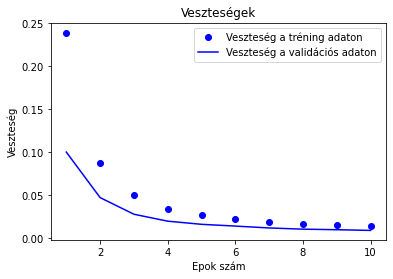

In [13]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Veszteség a tréning adaton')
plt.plot(epochs, val_loss, 'b', label='Veszteség a validációs adaton')
plt.title('Veszteségek')
plt.xlabel('Epok szám')
plt.ylabel('Veszteség')
plt.legend()
plt.savefig("loss_cubic_symmetry")
plt.show()

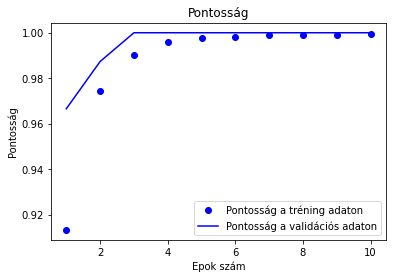

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'bo', label='Pontosság a tréning adaton')
plt.plot(epochs, val_acc, 'b', label='Pontosság a validációs adaton')
plt.title('Pontosság')
plt.xlabel('Epok szám')
plt.ylabel('Pontosság')
plt.legend()
plt.savefig("acc_cubic_symmetry")
plt.show()

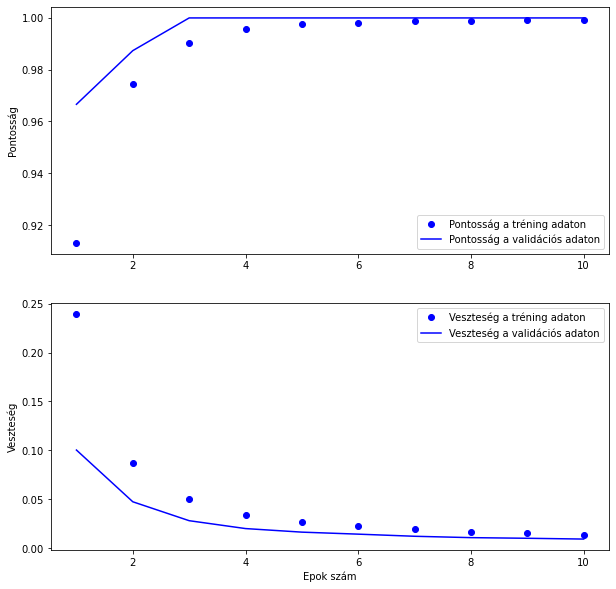

In [15]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(10,10))
ax1.plot(epochs, acc, 'bo', label='Pontosság a tréning adaton')
ax1.plot(epochs, val_acc, 'b', label='Pontosság a validációs adaton')
ax1.set_ylabel('Pontosság')
ax1.legend()
ax2.plot(epochs, loss, 'bo', label='Veszteség a tréning adaton')
ax2.plot(epochs, val_loss, 'b', label='Veszteség a validációs adaton')
ax2.set_xlabel('Epok szám')
ax2.set_ylabel('Veszteség')
ax2.legend()
plt.savefig('sym_one')

In [16]:
test_df = pd.read_csv('test_dataset_cubic.csv', sep='\t')

In [17]:
peaks_test = test_df[["peak_1", "peak_2", "peak_3", "peak_4","peak_5", "peak_6", "peak_7", "peak_8", "peak_9", "peak_10"]]
codes_test = test_df['space_code']

In [18]:
testing_data = pd.concat([peaks_test, codes_test], axis=1)

In [19]:
X_test = testing_data.drop(["space_code"], axis=1)

In [20]:
y_test = testing_data["space_code"]

In [21]:
y_test_re = np_utils.to_categorical(y_test)

In [22]:
model.evaluate(X_test, y_test_re)

40/40 [==============================] - 0s 187us/sample - loss: 0.0160 - accuracy: 1.0000


[0.016008874773979186, 1.0]

In [23]:
model = models.load_model("cubic_symmetry_model.h5")

In [24]:
model.predict(X_test[0:1])

array([[9.9780852e-01, 1.5904573e-03, 2.4241126e-07, 6.7653118e-06,
        5.9345330e-04, 5.4485031e-07]], dtype=float32)

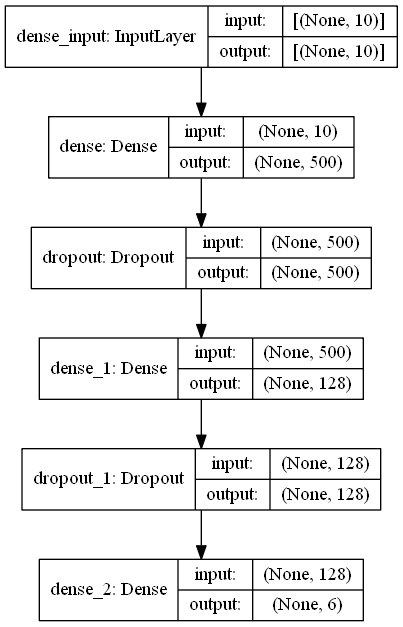

In [29]:
np_utils.plot_model(model, to_file='model_cubic_one.png', show_shapes=True)

In [26]:
!pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=d701d158da9e2d137a2cd62f44efe46a5007d5a9a119af9ffbe75d925f47de28
  Stored in directory: c:\users\dajka\appdata\local\pip\cache\wheels\1e\7b\04\7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus
